In [ ]:
# Developed by Saman Haratian
# Updated on: 10/28/2024
# Contact: sharatian@hawk.iit.edu

# Copyright (c) 2024 Built Environment Research Group
# Distributed under the MIT software license, see the accompanying
# file LICENSE or http://www.opensource.org/licenses/mit-license.php.

First, we need to install Cool Prop library. In Google Collab you can easily do it by usnig the following command.

In [ ]:
!pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.9 MB/s eta 0:00:00


Then, we have to import all needed the libraries. A library can be imported using import statement:

`import {Name of libabry} as {shorter name}`

You can also import specific modules or functions from a library:

`from  {Name of libabry} import {Module}`




In [ ]:
import numpy as np
import matplotlib.pyplot as pl
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot

# 1- Thermodynamic Properties


One of the main skills that every student should master is to find the values of different properties from table of properties. This skill is specially important when wone wants to determine the state of a system on a diagram.

Different values for different properties can be found using CoolProp.  From homework 5 we had:


State | T(C) | P(kPa) | v(m3/s) | x | Phase
----------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
(a) |140 | ? | 0.28 | ? | ? |
(b) |140 | 700 | ? | ? | ? |
(c) |350 | 800 | ? | ? | ? |
(d) |120 | ? | ? | 0.7 | ? |

To obtain any properies, one need to use the following format:

`CP.PropsSI('target property',  '1st given proprty',  2nd value of givern proprty,  '2nd given proprty', value of  2nd givern proprty ,'Material')`

In [ ]:
#State (a)
print ("State a:")
print("====================")
P_a= CP.PropsSI('P',  'T',  140+273.15,  'D', 1.0/0.28 ,'water')
print ('\t','P_a=', P_a/1000 ,'kPa')

x_a= CP.PropsSI('Q',  'T',  140+273.15,  'D', 1.0/0.28 ,'water')
print ('\t','x_a=', x_a)

print ('\t',"Phase description: ",CP.PhaseSI('T',140+273.15,'D',1.0/0.28,'Water'))

#State (b)
print ("State b:")
print("====================")
D_b= CP.PropsSI('D',  'T',  140+273.15,  'P', 700e3 ,'water')
print ('\t','v_b=', 1/D_b , 'm3/kg' )

x_b= CP.PropsSI('Q',  'T',  140+273.15,  'P', 700e3 ,'water')
print ('\t','x_b=', x_b)

print ('\t',"Phase description: ",CP.PhaseSI('T',  140+273.15,  'P', 700e3,'Water'))

#State (c)
print ("State c:")
print("====================")
D_c= CP.PropsSI('D',  'T',  350+273.15,  'P', 800e3 ,'water')
print ('\t','v_c=', 1/D_c , 'm3/kg' )

x_c= CP.PropsSI('Q',  'T',  350+273.15,  'P', 800e3 ,'water')
print ('\t','x_c=', x_c)

print ('\t',"Phase description: ",CP.PhaseSI('T',  350+273.15,  'P', 800e3,'Water'))


#State (d)
print ("State d:")
print("====================")
P_d= CP.PropsSI('P',  'T',  120+273.15,  'Q', 0.7 ,'water')
print ('\t','P_d=', P_d/1000 ,'kPa')

D_d= CP.PropsSI('D',  'T',  120+273.15,  'Q', 0.7 ,'water')
print ('\t','v_d=', 1/D_d)

print ('\t',"Phase description: ",CP.PhaseSI('T',120+273.15,'Q', 0.7, 'Water'))

State a:
	 P_a= 361.5390993988951 kPa
	 x_a= 0.5497324101098541
	 Phase description:  twophase
State b:
	 v_b= 0.0010795427146345204 m3/kg
	 x_b= -1.0
	 Phase description:  liquid
State c:
	 v_c= 0.35442327414048347 m3/kg
	 x_c= -1.0
	 Phase description:  gas
State d:
	 P_d= 198.67442047958036 kPa
	 v_d= 0.62416665604225
	 Phase description:  twophase


<ipython-input-139-1748b022058a>:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([1e-4, 50 , 0, 700])


Text(0.0008795427146345204, 0.7, '(b)')

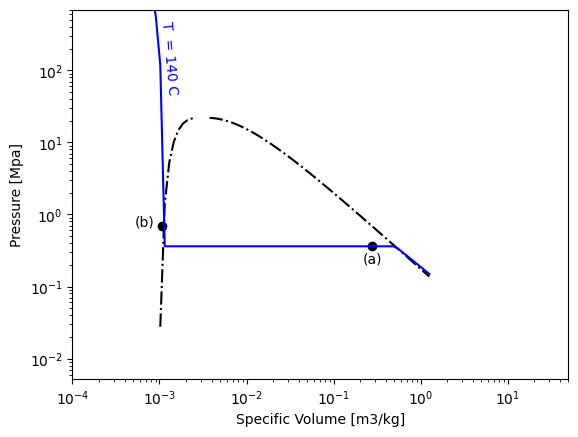

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot



specific_volume= np.logspace (-5, 0.1, 100)
density= 1/ specific_volume

# Constant temperature line at 400 C
T1=140+273.15
P1=CP.PropsSI('P', 'D', density, 'Q' , 1, 'water')
P2=CP.PropsSI('P', 'D', density, 'Q' , 0, 'water')

plt.loglog(specific_volume, P1/1e6, linestyle="dashdot", color='black')
plt.loglog(specific_volume, P2/1e6, linestyle="dashdot", color='black')

P3=CP.PropsSI('P', 'D', density, 'T' ,T1 , 'water')
plt.loglog(specific_volume, P3/1e6, color= "blue")



plt.xlabel("Specific Volume [m3/kg]")
plt.ylabel("Pressure [Mpa]")

plt.axis([1e-4, 50 , 0, 700])
plt.scatter(0.28 , P_a/1e6, color= "black")
plt.annotate("(a)", (0.28 , (P_a/1e6)-0.15), ha='center', color= "black")
plt.annotate("T  = 140 C", (1e-3 , 0.5e2), ha='left', color= "blue", rotation=-85)


plt.scatter(1/D_b , 700000/1e6, color= "black")
plt.annotate("(b)", ((1/D_b)-0.0002 , (700000/1e6)), ha='right', color= "black")

